In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing require python classes and packages
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pickle

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential, load_model
from keras.layers import Dense, TimeDistributed, Conv1D, MaxPooling1D, Flatten, Activation, RepeatVector
from keras.layers import LSTM #class for LSTM training
import os
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.layers import Bidirectional, GRU #class for bidirectional LSTM as BILSTM and GRU
from keras.utils.np_utils import to_categorical

from sklearn.metrics import accuracy_score
import pickle
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut #class to calculate LOSO
from sklearn.model_selection import cross_val_score

In [3]:
#use to scale or normalize dataset values
scaler = MinMaxScaler((0,1))

In [4]:
#load and display dataset values
dataset = pd.read_csv("Dataset/BioVid_coords.csv")
dataset.fillna(0, inplace = True)
dataset

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,Label
0,0.0,169.0,133.0,169.0,146.0,171.0,160.0,173.0,172.0,177.0,...,228.0,183.0,238.0,183.0,228.0,183.0,223.0,184.0,218.0,0
1,0.0,169.0,131.0,170.0,145.0,171.0,158.0,173.0,171.0,177.0,...,228.0,183.0,238.0,184.0,228.0,184.0,223.0,185.0,218.0,0
2,0.0,170.0,132.0,170.0,145.0,172.0,158.0,173.0,171.0,177.0,...,228.0,182.0,238.0,184.0,228.0,187.0,223.0,187.0,218.0,0
3,0.0,170.0,131.0,170.0,145.0,172.0,158.0,174.0,172.0,178.0,...,228.0,182.0,238.0,184.0,228.0,187.0,223.0,187.0,218.0,0
4,0.0,169.0,131.0,170.0,145.0,172.0,158.0,174.0,171.0,177.0,...,228.0,183.0,237.0,184.0,228.0,186.0,223.0,187.0,218.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999,57.0,170.0,136.0,170.0,149.0,172.0,162.0,173.0,174.0,176.0,...,225.0,189.0,234.0,190.0,224.0,189.0,219.0,189.0,215.0,3
8000,57.0,171.0,135.0,171.0,148.0,172.0,161.0,174.0,174.0,176.0,...,224.0,189.0,234.0,190.0,224.0,189.0,219.0,189.0,215.0,3
8001,57.0,171.0,135.0,171.0,148.0,172.0,161.0,174.0,174.0,176.0,...,225.0,189.0,234.0,190.0,224.0,189.0,219.0,189.0,215.0,3
8002,57.0,171.0,136.0,171.0,149.0,172.0,162.0,173.0,174.0,176.0,...,224.0,189.0,234.0,190.0,224.0,189.0,219.0,189.0,215.0,3


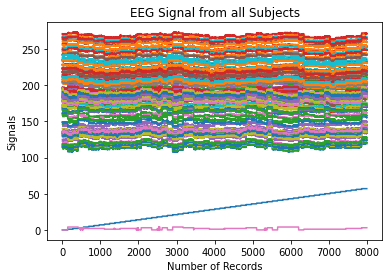

In [5]:
data = dataset.values
plt.plot(data) 
plt.xlabel("Number of Records")
plt.ylabel("Signals")
plt.title("EEG Signal from all Subjects")
plt.show()

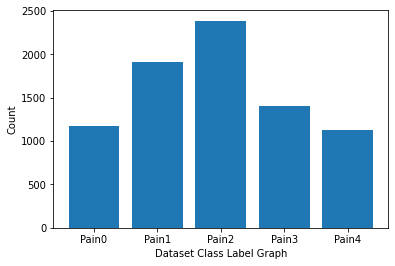

In [6]:
#plot labels in dataset
labels, count = np.unique(dataset['Label'], return_counts = True)
labels = ["Pain0", "Pain1", "Pain2" ,"Pain3", "Pain4"]
height = count
bars = labels
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel("Dataset Class Label Graph")
plt.ylabel("Count")
plt.show()

In [7]:
#code to extract X training features and Y label from dataset and then normalize and shuffle dataset values
dataset = dataset.values
X = dataset[:,0:dataset.shape[1]-1] #extract training features as X
Y = dataset[:,dataset.shape[1]-1] #extract target pain label
X = scaler.fit_transform(X)#normalized features
indices = np.arange(X.shape[0])
np.random.shuffle(indices) #shuffle the dataset values
X = X[indices]
Y = Y[indices]
print("Normalized Training Features : "+str(X))

Normalized Training Features : [[0.8245614  0.27272727 0.45454545 ... 0.25       0.46153846 0.25      ]
 [0.50877193 0.36363636 0.63636364 ... 0.41666667 0.38461538 0.41666667]
 [0.01754386 0.81818182 0.18181818 ... 0.91666667 0.15384615 0.91666667]
 ...
 [0.70175439 0.72727273 0.36363636 ... 0.83333333 0.30769231 0.83333333]
 [0.75438596 0.81818182 0.09090909 ... 0.91666667 0.07692308 0.91666667]
 [0.66666667 0.72727273 0.63636364 ... 0.58333333 0.30769231 0.58333333]]


In [46]:
#split dataset into train and test where 80% dataset is for training and 20 for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) #split dataset into train and test
print()
print("Dataset train & test split as 80% dataset for training and 20% for testing")
print("Training Size (80%): "+str(X_train.shape[0])) #print training and test size
print("Testing Size (20%): "+str(X_test.shape[0]))
print()


Dataset train & test split as 80% dataset for training and 20% for testing
Training Size (80%): 6403
Testing Size (20%): 1601



In [11]:
#define global variables to calculate and store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []
loso = []

ML_Model = []
acc = []
prec = []
rec = []
f1 = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    acc.append(round(a, 3))
    prec.append(round(b, 3))
    rec.append(round(c, 3))
    f1.append(round(d, 3))

In [12]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY, loso_value):
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100     
    print()
    print(algorithm+' Accuracy  : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FMeasure    : '+str(f))  
    print(algorithm+' LOSO        : '+str(loso_value))
    loso.append(loso_value)
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# Random Forest


Existing Random Forest Accuracy  : 52.966895690193624
Existing Random Forest Precision   : 27.40920950867322
Existing Random Forest Recall      : 39.787234042553195
Existing Random Forest FMeasure    : 30.921991718512665
Existing Random Forest LOSO        : 0.5290443472829481


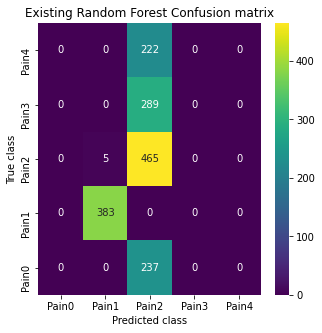

In [13]:
#train existing Random Forest algorithm and then calculate LOSO and other metrics
rf = RandomForestClassifier(ccp_alpha=0.2)
rf.fit(X_train, y_train)#train random forest algorithm
predict = rf.predict(X_test)#perform prediction on test data
cv = LeaveOneOut() #calculate leave one out as LOSO
loso_score = cross_val_score(rf, X_test, y_test, scoring='f1_micro', cv=cv, n_jobs=-1)
calculateMetrics("Existing Random Forest", predict, y_test, np.mean(loso_score))#call function to calculate accuracy and other metrics


In [14]:
rf_acc = accuracy_score(predict, y_test)
rf_prec = precision_score(predict, y_test,average='macro')
rf_rec = recall_score(predict, y_test,average='macro')
rf_f1 = f1_score(predict, y_test,average='macro')

In [15]:
storeResults('Random Forest',rf_acc,rf_prec,rf_rec,rf_f1)

# Stacking Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=10)),('dt', DecisionTreeClassifier())]

clf = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier())

# fit the model 
clf.fit(X_test, y_test)

y_pred = clf.predict(X_test)

stac_acc_a = accuracy_score(y_test,y_pred)
stac_prec_a = precision_score(y_test,y_pred,average='macro')
stac_rec_a = recall_score(y_test,y_pred,average='macro')
stac_f1_a = f1_score(y_test,y_pred,average='macro')


Stacking Accuracy  : 99.87507807620237
Stacking Precision   : 99.83122362869199
Stacking Recall      : 99.88857163774802
Stacking FMeasure    : 99.85945793783087
Stacking LOSO        : 0.5290443472829481


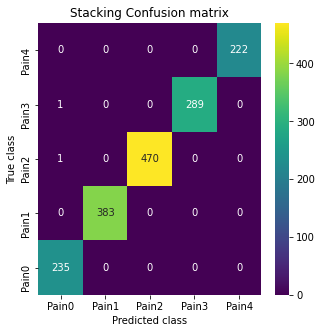

In [22]:
calculateMetrics("Stacking", y_test,y_pred, np.mean(loso_score))

In [23]:
storeResults('Stacking Classifier',stac_acc_a,stac_prec_a,stac_rec_a,stac_f1_a)

# Propose CNN + BILSTM

In [29]:
#now train propose CNN + BILSTM algorithm on training features
#reshape training data
X_train = np.reshape(X_train, (X_train.shape[0], 34, 4))
X_test = np.reshape(X_test, (X_test.shape[0], 34, 4))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

101/101 [==============================] - 2s 6ms/step - loss: 0.3120 - accuracy: 0.8607

Propose CNN + BILSTM Accuracy  : 86.07120549656464
Propose CNN + BILSTM Precision   : 82.45063329736026
Propose CNN + BILSTM Recall      : 80.08270393876839
Propose CNN + BILSTM FMeasure    : 74.11766706981734
Propose CNN + BILSTM LOSO        : 0.8607120513916016


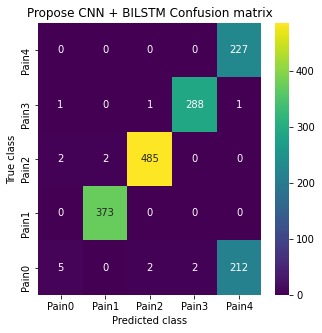

In [30]:
#create CNN sequential object
propose_model = Sequential()
#create CNN1D layer with 32 neurons for data filteration and pool size as 3
propose_model.add(Conv1D(filters=32, kernel_size = 3, activation = 'relu', input_shape = (X_train.shape[1], X_train.shape[2])))
#defining another CNN layer with 64 neurons
propose_model.add(Conv1D(filters=64, kernel_size = 2, activation = 'relu'))
propose_model.add(Conv1D(filters=128, kernel_size = 2, activation = 'relu'))
#max pooling layer to collect relevant features from CNN layer
propose_model.add(MaxPooling1D(pool_size = 1))
propose_model.add(Flatten())
propose_model.add(RepeatVector(2))
#defining BILSTM kayer with 32 neurons to optimize CNN features
propose_model.add(Bidirectional(LSTM(32, activation = 'relu', return_sequences=True)))
propose_model.add(Bidirectional(LSTM(64, activation = 'relu')))
#adding dropout layer to remove irrelevant features
propose_model.add(Dropout(0.2))
#defining output an dprediction layer
propose_model.add(Dense(units = 100, activation = 'softmax'))
propose_model.add(Dense(units = y_train.shape[1], activation = 'softmax'))
#train and compile the model
propose_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
if os.path.exists("model/propose_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/propose_weights.hdf5', verbose = 1, save_best_only = True)
    hist = propose_model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data=(X_test, y_test), callbacks=[model_check_point], verbose=1)
    f = open('model/propose_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()    
else:
    propose_model = load_model("model/propose_weights.hdf5")
#perform prediction on test data   
predict = propose_model.predict(X_test)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test, axis=1)
#calculate LOSO score
loso_score = np.amax(propose_model.evaluate(X_test, y_test, batch_size=16))
calculateMetrics("Propose CNN + BILSTM", predict, y_test1, loso_score)#call function to calculate accuracy and other metrics


In [31]:
cnlstm_acc = accuracy_score(predict, y_test1)
cnlstm_prec = precision_score(predict, y_test1,average='weighted')
cnlstm_rec = recall_score(predict, y_test1,average='weighted')
cnlstm_f1 = f1_score(predict, y_test1,average='weighted')

In [32]:
storeResults('Propose CNN + BILSTM',cnlstm_acc,cnlstm_prec,cnlstm_rec,cnlstm_f1)

# CNN + BILSTM + BiGRU

101/101 [==============================] - 2s 7ms/step - loss: 0.2630 - accuracy: 0.9838

Propose CNN + BILSTM Accuracy  : 98.37601499063085
Propose CNN + BILSTM Precision   : 98.31438775860353
Propose CNN + BILSTM Recall      : 98.73454604781962
Propose CNN + BILSTM FMeasure    : 98.50619280285382
Propose CNN + BILSTM LOSO        : 0.9837601780891418


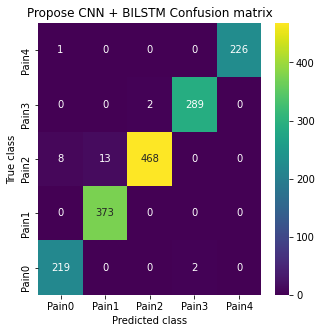

In [33]:
#create extension model using CNN1D + BILSTM + GRU as each algorithm has its own implementation of fetaures extraction so
#BILSTM will extract optimize features from CNN and then GRU will extract features BILSTM so will have features after 3
#optimization algorithm so will get best accuracy
extension_model = Sequential()
#create CNN1D layer with 32 neurons for data filteration and pool size as 3
extension_model.add(Conv1D(filters=32, kernel_size = 3, activation = 'relu', input_shape = (X_train.shape[1], X_train.shape[2])))
extension_model.add(Conv1D(filters=64, kernel_size = 2, activation = 'relu'))
extension_model.add(Conv1D(filters=128, kernel_size = 2, activation = 'relu'))
extension_model.add(MaxPooling1D(pool_size = 1))
extension_model.add(Flatten())
extension_model.add(RepeatVector(2))
#adding LSTM Bidirectional layer to obtained optimized features from CNN
extension_model.add(Bidirectional(LSTM(32, activation = 'relu', return_sequences=True)))
#now bidirectional GRU will extract optimized fetaures from BI-LSTM and then train a model with below prediction layer
extension_model.add(Bidirectional(GRU(64, activation = 'relu')))
extension_model.add(Dropout(0.2))
#Define output prediction layer
extension_model.add(Dense(units = 100, activation = 'softmax'))
extension_model.add(Dense(units = y_train.shape[1], activation = 'softmax'))
#compile and train the model
extension_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
if os.path.exists("model/extension_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/extension_weights.hdf5', verbose = 1, save_best_only = True)
    hist = extension_model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data=(X_test, y_test), callbacks=[model_check_point], verbose=1)
    f = open('model/extension_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()    
else:
    extension_model = load_model("model/extension_weights.hdf5")
#perform prediction on test data   
predict = extension_model.predict(X_test)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test, axis=1)
#calculate LOSO score
loso_score = np.amax(extension_model.evaluate(X_test, y_test, batch_size=16))
calculateMetrics("Propose CNN + BILSTM", predict, y_test1, loso_score)#call function to calculate accuracy and other metrics

In [34]:
cnlstm_acc = accuracy_score(predict, y_test1)
cnlstm_prec = precision_score(predict, y_test1,average='weighted')
cnlstm_rec = recall_score(predict, y_test1,average='weighted')
cnlstm_f1 = f1_score(predict, y_test1,average='weighted')

storeResults('Extension CNN + BILSTM+GRU',cnlstm_acc,cnlstm_prec,cnlstm_rec,cnlstm_f1)

# Comparison

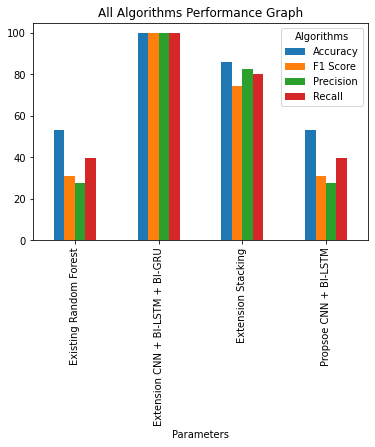

In [37]:
#all algorithms performance graph
df = pd.DataFrame([['Existing Random Forest','Precision',precision[0]],['Existing Random Forest','Recall',recall[0]],['Existing Random Forest','F1 Score',fscore[0]],['Existing Random Forest','Accuracy',accuracy[0]],
                   ['Extension Stacking','Precision',precision[3]],['Extension Stacking','Recall',recall[3]],['Extension Stacking','F1 Score',fscore[3]],['Extension Stacking','Accuracy',accuracy[3]],
                   ['Propsoe CNN + BI-LSTM','Precision',precision[1]],['Propsoe CNN + BI-LSTM','Recall',recall[1]],['Propsoe CNN + BI-LSTM','F1 Score',fscore[1]],['Propsoe CNN + BI-LSTM','Accuracy',accuracy[1]],
                   ['Extension CNN + BI-LSTM + BI-GRU','Precision',precision[2]],['Extension CNN + BI-LSTM + BI-GRU','Recall',recall[2]],['Extension CNN + BI-LSTM + BI-GRU','F1 Score',fscore[2]],['Extension CNN + BI-LSTM + BI-GRU','Accuracy',accuracy[2]],
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar')
plt.title("All Algorithms Performance Graph")
plt.show()

In [39]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : acc,
                       'Precision': prec, 
                       'f1_score' : f1,
                        'Recall'   : rec,
                        
                      })

In [40]:
result

,ML Model,Accuracy,Precision,f1_score,Recall
0,Random Forest,0.530,0.398,0.309,0.274
1,Stacking Classifier,0.999,0.999,0.999,0.998
2,Propose CNN + BILSTM,0.861,0.991,0.903,0.861
3,Propose CNN + BILSTM+GRU,0.984,0.984,0.984,0.984


In [47]:
import joblib
filename = 'model.sav'
joblib.dump(clf, filename)

['model.sav']

In [41]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

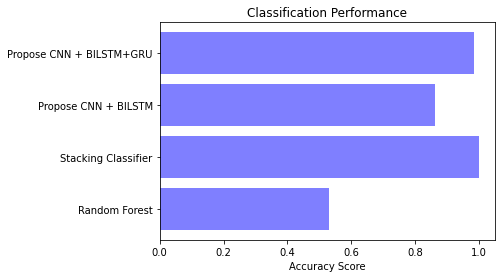

In [42]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, acc, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

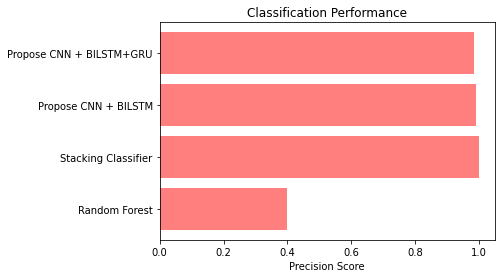

In [43]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, prec, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

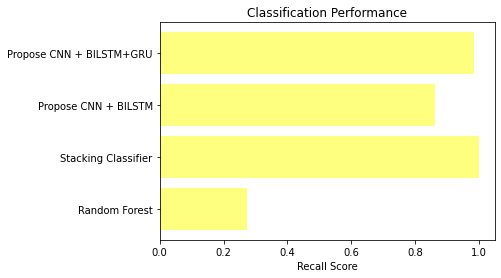

In [44]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, rec, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

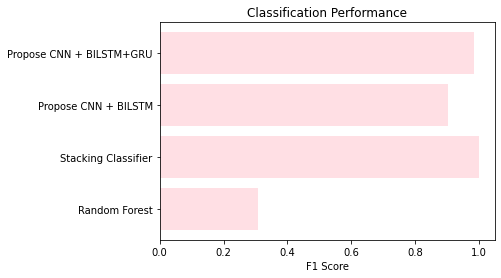

In [45]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, f1, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

In [48]:
X = pd.DataFrame(X_test)
y = pd.DataFrame(y_test)

result = pd.concat([X,y], axis=1, join='inner')

In [50]:
result.to_csv('processed.csv')

In [56]:
import joblib
model = joblib.load('model.sav')

In [51]:
import numpy as np

In [72]:
lst = [0.631578947,0.636363636,0.727272727,0.727272727,0.7,0.7,0.727272727,0.777777778,0.636363636,0.666666667,0.7,0.6,0.777777778,0.545454545,0.777777778,0.5,0.8,0.5,0.818181818,0.5,0.727272727,0.5,0.727272727,0.545454545,0.833333333,0.6,0.75,0.6,0.692307692,0.666666667,0.692307692,0.6,0.714285714,0.7,0.714285714,0.666666667,0.75,0.583333333,0.727272727,0.583333333,0.75,0.636363636,0.769230769,0.583333333,0.769230769,0.615384615,0.769230769,0.583333333,0.692307692,0.666666667,0.692307692,0.615384615,0.666666667,0.727272727,0.666666667,0.583333333,0.75,0.583333333,0.692307692,0.583333333,0.769230769,0.583333333,0.714285714,0.5,0.692307692,0.583333333,0.692307692,0.545454545,0.769230769,0.583333333,0.75,0.583333333,0.769230769,0.636363636,0.75,0.666666667,0.6,0.636363636,0.6,0.545454545,0.75,0.636363636,0.692307692,0.636363636,0.692307692,0.636363636,0.615384615,0.583333333,0.529411765,0.583333333,0.529411765,0.636363636,0.615384615,0.636363636,0.571428571,0.636363636,0.571428571,0.583333333,0.8,0.583333333,0.75,0.538461538,0.75,0.583333333,0.769230769,0.583333333,0.769230769,0.545454545,0.692307692,0.461538462,0.727272727,0.5,0.692307692,0.583333333,0.692307692,0.545454545,0.692307692,0.5,0.692307692,0.545454545,0.75,0.583333333,0.727272727,0.583333333,0.769230769,0.583333333,0.75,0.583333333,0.75,0.461538462,0.727272727,0.583333333,0.692307692,0.583333333,0.769230769,0.583333333

]


In [73]:
arr = np.asarray(lst)
np.save('sample/sam1_3',arr)

In [70]:
data = np.load('sample/sam1_0.npy')
final4=[np.array(data)]
predict = model.predict(final4)

In [71]:
predict[0]

0.0